jupyter nbconvert 3_report_generator.ipynb --to script

conda activate pytorch;python 3_report_generator.py $WINDOW

In [44]:
import os
import sys
print(os.getcwd());os.chdir('../')
print(os.getcwd())

/data01/ch6845/MarcoPolo
/data01/ch6845/MarcoPolo


In [2]:
import pandas as pd
import numpy as np
from scipy.io import mmread

import matplotlib.pyplot as plt

import MarcoPolo.QQscore as QQ

In [3]:
dataset_name_all=[
'Kohinbulk_filtered',
'HumanLiver_filtered',   
'Zhengmix8eq_filtered',
]

len(dataset_name_all)

3

In [4]:
dataset_name_all=dataset_name_all+["TabulaAorta_filtered", #ok
"TabulaBladder_filtered", #ok
"TabulaBrainMyeloid_filtered", #ok
                  
"TabulaBrainNonMyeloid_filtered",#ok
"TabulaDiaphragm_filtered", #ok

"TabulaFat_filtered", #ok
"TabulaHeart_filtered", #ok

"TabulaKidney_filtered", #ok
"TabulaLargeIntestine_filtered", #ok
"TabulaLimbMuscle_filtered", #ok

"TabulaLiver_filtered", #ok
"TabulaLung_filtered", #ok

"TabulaMammaryGland_filtered", #ok
"TabulaMarrow_filtered", #ok

"TabulaPancreas_filtered", #ok
"TabulaSkin_filtered", #ok
                  
"TabulaSpleen_filtered", #ok
"TabulaThymus_filtered", #ok
                  
"TabulaTongue_filtered", #ok
"TabulaTrachea_filtered"] #ok

In [5]:
if 'ipykernel' in sys.argv[0]:
    ipykernel=True
    dataset_name=dataset_name_all[0]
    output_mode='report'
else:
    ipykernel=False
    dataset_name=dataset_name_all[int(sys.argv[1])]
    if sys.argv[2]=='pub':
        output_mode='pub'
    elif sys.argv[2]=='test':
        output_mode='report'
    else:
        raise

In [6]:
mode=2

In [7]:
path='datasets/extract/{}'.format(dataset_name)
path

'datasets/extract/Kohinbulk_filtered'

In [8]:
print(path)

datasets/extract/Kohinbulk_filtered


In [9]:
if output_mode=='report':
    report_path='report/{}'.format(path.split('/')[-1])
    print(report_path)
elif output_mode=='pub':
    report_path='docs/{}'.format(path.split('/')[-1].replace('_filtered',''))
    report_path=report_path.replace('Kohinbulk','hESC')
    print(report_path)    

report/Kohinbulk_filtered


In [10]:
exp_data=mmread('{}.data.counts.mm'.format(path)).toarray().astype(float)
with open('{}.data.col'.format(path),'r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))
assert len(set(exp_data_row))==len(exp_data_row)
assert len(set(exp_data_col))==len(exp_data_col)        

exp_data_meta=pd.read_csv('{}.metadatacol.tsv'.format(path),sep='\t')

cell_size_factor=pd.read_csv('{}.size_factor.tsv'.format(path),sep='\t',header=None)[0].values.astype(float)#.reshape(-1,1)

x_data_intercept=np.array([np.ones(exp_data.shape[1])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)

In [17]:
result_list,gamma_list_list,delta_log_list_list,beta_list_list=QQ.read_QQscore(path,[1,mode])

In [18]:
gamma_list=gamma_list_list[-1]    

gamma_argmax_list=QQ.gamma_list_exp_data_to_gamma_argmax_list(gamma_list,exp_data)#gamma_argmax_list=QQ.gamma_list_to_gamma_argmax_list(gamma_list)
gamma_argmax_list,gamma_argmax_list.shape

/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning

(array([[1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 0, 0]]),
 (14694, 446))

In [162]:
# voting score
minorsize_list=np.sum(gamma_argmax_list==0,axis=1)
minorsize_cliplist=QQ.gamma_argmax_list_to_minorsize_list_list(gamma_argmax_list)
intersection_list=QQ.gamma_argmax_list_to_intersection_list(gamma_argmax_list)
intersectioncount_prop=((intersection_list/minorsize_cliplist))
intersectioncount_prop_top10=[np.arange(0,len(i))[i>=sorted(i)[-10]][:10] for i in intersectioncount_prop]
intersectioncount_threshold=((intersection_list/minorsize_cliplist)>0.7)
intersectioncount_thresholdcount=np.sum(intersectioncount_threshold,axis=1)

[140 446 446 ...  33  27  82]


In [45]:
allscore=pd.read_csv('{}.MarcoPolo.{}.rank.tsv'.format(path,mode),index_col=0,sep='\t')

# Gene DB

In [164]:
#wget https://ftp.ncbi.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz

gene_info=pd.read_csv('datasets/Homo_sapiens.gene_info.gz',sep='\t')

In [21]:
import sys

by='ID' if 'ENS' in exp_data_row[0] else 'name'

gene_info_select_list=[]

column_list=['Symbol','description','Other_designations','type_of_gene','dbXrefs']

for idx, query in enumerate(exp_data_row):
    if by=='ID':
        gene_info_select=gene_info[gene_info['dbXrefs'].str.contains(query,regex=False)]
    else:
        gene_info_select=gene_info[gene_info['Symbol'].str.lower()==query.lower()]
        if len(gene_info_select)==0:
            gene_info_select=gene_info[gene_info['Synonyms'].str.lower().str.contains(query.lower(),regex=False)]
        
    if len(gene_info_select)>=1:
        gene_info_select_list.append(gene_info_select[column_list].iloc[0])
    else:
        gene_info_select_list.append(pd.Series(index=column_list))
        print(query,len(gene_info_select))
    
    if idx%100==0:
        sys.stdout.write('\r%0.2f%%' % (100.0 * (idx/len(exp_data_row))))
        sys.stdout.flush()
gene_info_extract=pd.DataFrame(gene_info_select_list,index=np.arange(len(exp_data_row)))        

ENSG00000198804 0
0.00%

/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


ENSG00000210082 0
ENSG00000198712 0
ENSG00000198938 0
ENSG00000198727 0
ENSG00000211459 0
ENSG00000198899 0
ENSG00000198886 0
ENSG00000198763 0
ENSG00000198888 0
ENSG00000198786 0
ENSG00000212907 0
0.68%ENSG00000225840 0
ENSG00000274474 0
ENSG00000183311 0
ENSG00000223367 0
ENSG00000226225 0
ENSG00000235650 0
ENSG00000096150 0
ENSG00000273673 0
1.36%ENSG00000228253 0
ENSG00000224078 0
ENSG00000198695 0
ENSG00000280831 0
ENSG00000280858 0
ENSG00000281344 0
ENSG00000280800 0
ENSG00000281181 0
ENSG00000280614 0
3.40%ENSG00000281013 0
ENSG00000276701 0
ENSG00000281917 0
4.08%ENSG00000278229 0
ENSG00000280156 0
ENSG00000251637 0
ENSG00000265401 0
ENSG00000283094 0
4.76%ENSG00000275903 0
ENSG00000198840 0
5.44%ENSG00000229684 0
ENSG00000232421 0
ENSG00000232575 0
ENSG00000224156 0
ENSG00000235067 0
6.12%ENSG00000282986 0
ENSG00000276371 0
ENSG00000261604 0
6.81%ENSG00000282958 0
7.49%ENSG00000282847 0
ENSG00000274442 0
ENSG00000263986 0
ENSG00000280606 0
8.85%ENSG00000262967 0
9.53%ENSG00000

ENSG00000281915 0
ENSG00000279175 0
ENSG00000280674 0
ENSG00000282269 0
ENSG00000279765 0
50.36%ENSG00000272379 0
ENSG00000282953 0
ENSG00000257966 0
ENSG00000280512 0
ENSG00000231737 0
ENSG00000235291 0
ENSG00000184906 0
ENSG00000276262 0
ENSG00000204789 0
ENSG00000227804 0
ENSG00000238104 0
ENSG00000230995 0
ENSG00000283103 0
ENSG00000260417 0
ENSG00000197332 0
ENSG00000261992 0
ENSG00000228113 0
ENSG00000197099 0
ENSG00000276072 0
ENSG00000225506 0
ENSG00000282171 0
51.04%ENSG00000262160 0
ENSG00000276061 0
ENSG00000224905 0
ENSG00000275495 0
ENSG00000278494 0
ENSG00000224358 0
ENSG00000235288 0
ENSG00000259104 0
ENSG00000280511 0
ENSG00000275867 0
ENSG00000263244 0
ENSG00000276761 0
ENSG00000264956 0
ENSG00000273015 0
51.72%ENSG00000213971 0
ENSG00000215077 0
ENSG00000278666 0
ENSG00000261799 0
ENSG00000253893 0
ENSG00000227046 0
ENSG00000206206 0
ENSG00000281794 0
ENSG00000255339 0
ENSG00000266671 0
ENSG00000282228 0
ENSG00000225442 0
ENSG00000260793 0
ENSG00000277767 0
ENSG000002

69.42%ENSG00000274317 0
ENSG00000225201 0
ENSG00000236632 0
ENSG00000254556 0
ENSG00000231616 0
ENSG00000196810 0
ENSG00000213297 0
ENSG00000235423 0
ENSG00000281022 0
ENSG00000251048 0
ENSG00000253284 0
ENSG00000236227 0
ENSG00000272921 0
ENSG00000273489 0
ENSG00000272335 0
ENSG00000257474 0
ENSG00000213865 0
ENSG00000267462 0
ENSG00000278741 0
ENSG00000261592 0
ENSG00000276517 0
70.10%ENSG00000223704 0
ENSG00000279927 0
ENSG00000262049 0
ENSG00000274780 0
ENSG00000262312 0
ENSG00000234072 0
ENSG00000232300 0
ENSG00000258807 0
ENSG00000224837 0
ENSG00000268635 0
ENSG00000281657 0
ENSG00000210112 0
ENSG00000236063 0
ENSG00000235676 0
ENSG00000278126 0
ENSG00000231488 0
ENSG00000282220 0
ENSG00000263424 0
ENSG00000229152 0
ENSG00000276672 0
ENSG00000261804 0
ENSG00000224822 0
ENSG00000188002 0
ENSG00000275764 0
ENSG00000273382 0
70.78%ENSG00000282744 0
ENSG00000260126 0
ENSG00000261685 0
ENSG00000282988 0
ENSG00000237719 0
ENSG00000277715 0
ENSG00000277365 0
ENSG00000273397 0
ENSG000002

ENSG00000206567 0
ENSG00000253317 0
ENSG00000250790 0
ENSG00000235176 0
ENSG00000227486 0
ENSG00000281213 0
ENSG00000280733 0
ENSG00000232957 0
ENSG00000251273 0
ENSG00000267412 0
ENSG00000281950 0
ENSG00000229717 0
ENSG00000235443 0
ENSG00000236949 0
ENSG00000258593 0
ENSG00000267886 0
ENSG00000258256 0
ENSG00000226472 0
ENSG00000260078 0
ENSG00000255105 0
ENSG00000205176 0
ENSG00000249994 0
ENSG00000275118 0
ENSG00000251661 0
ENSG00000236808 0
ENSG00000265791 0
ENSG00000231825 0
ENSG00000206427 0
ENSG00000231698 0
ENSG00000230732 0
ENSG00000262599 0
ENSG00000258422 0
ENSG00000234539 0
ENSG00000251050 0
ENSG00000277669 0
ENSG00000234549 0
83.71%ENSG00000229061 0
ENSG00000206488 0
ENSG00000280447 0
ENSG00000279712 0
ENSG00000272754 0
ENSG00000281484 0
ENSG00000232006 0
ENSG00000178636 0
ENSG00000281367 0
ENSG00000249409 0
ENSG00000257275 0
ENSG00000231057 0
ENSG00000235884 0
ENSG00000237212 0
ENSG00000204197 0
ENSG00000230612 0
ENSG00000267749 0
ENSG00000228140 0
ENSG00000273492 0
ENSG

ENSG00000223396 0
ENSG00000276115 0
ENSG00000228643 0
ENSG00000275035 0
ENSG00000260757 0
ENSG00000266718 0
ENSG00000206282 0
ENSG00000250320 0
ENSG00000221883 0
ENSG00000253106 0
ENSG00000263338 0
93.24%ENSG00000237825 0
ENSG00000224841 0
ENSG00000266171 0
ENSG00000228736 0
ENSG00000276495 0
ENSG00000254577 0
ENSG00000206284 0
ENSG00000265959 0
ENSG00000270986 0
ENSG00000229172 0
ENSG00000282905 0
ENSG00000261338 0
ENSG00000236850 0
ENSG00000255355 0
ENSG00000273952 0
ENSG00000233705 0
ENSG00000228393 0
ENSG00000282003 0
ENSG00000273768 0
ENSG00000275405 0
ENSG00000276002 0
ENSG00000259445 0
ENSG00000230465 0
ENSG00000245667 0
ENSG00000251339 0
ENSG00000228506 0
ENSG00000261763 0
ENSG00000205056 0
ENSG00000253320 0
ENSG00000281617 0
ENSG00000254717 0
ENSG00000277628 0
ENSG00000274514 0
ENSG00000183574 0
ENSG00000225452 0
ENSG00000261177 0
ENSG00000227277 0
ENSG00000223767 0
ENSG00000228907 0
93.92%ENSG00000275586 0
ENSG00000255456 0
ENSG00000236445 0
ENSG00000236540 0
ENSG00000281790 

In [165]:
allscore_munge=allscore.copy()
allscore_munge['Gene ID']=exp_data_row
assert len(gene_info_extract)==len(allscore_munge)
allscore_munge=allscore_munge.merge(right=gene_info_extract,left_index=True,right_index=True)

In [166]:
allscore_munge[allscore_munge['Gene ID']=="ENSG00000168542"].iloc[:10]

,QQratio,intersectioncount,PCstd,lfc,mean_0_all,minorsize,maxdiff,voting_thresholded,ismarker,QQratio_rank,...,proximityscore_rank,MarcoPolo,MarcoPolo_rank,voting_thresholded_bool,Gene ID,Symbol,description,Other_designations,type_of_gene,dbXrefs
5510,9.059063,105,7.820091,2.044141,2080.533173,68,1.548958,"['True', 'True', 'True', 'True', 'True', 'Fals...",True,1,...,71,1,0,"[True, True, True, True, True, False, False, F...",ENSG00000168542,COL3A1,collagen type III alpha 1 chain,collagen alpha-1(III) chain|Ehlers-Danlos synd...,protein-coding,MIM:120180|HGNC:HGNC:2201|Ensembl:ENSG00000168542


In [167]:
#allscore_munge.sort_values('MarcoPolo_rank').iloc[:20,:20]

In [191]:
allscore_munge['Voting_genes_top10']=[allscore_munge['Gene ID'][i].values for i in intersectioncount_prop_top10]
allscore_munge_voting=allscore_munge.copy()

In [81]:
allscore_munge.to_csv('{}.MarcoPolo.{}.rank.munge.tsv'.format(path,mode),sep='\t')

In [107]:
allscore_munge['img']=allscore_munge.apply(lambda x: '<img src="plot_image/{idx}.png" alt="{idx}">'.format(dataset_name=dataset_name,idx=x.name),axis=1)

In [51]:
allscore_munge['Log2FC']=allscore_munge['lfc']/np.log10(2)

if output_mode=='report':

    allscore_munge=allscore_munge[[
                                'MarcoPolo_rank',
                                'Gene ID','Symbol',
                                'description', 'Other_designations', 'type_of_gene',
                                'Log2FC',
                                'MarcoPolo',
                                'QQratio', 'QQratio_rank',
                                'QQdiff', 'QQdiff_rank',
                                'votingscore', 'votingscore_rank',
                                'mean_0_all','mean_0_all_rank',
                                'PCvariance', 'PCvariance_rank',
                                'lfc', 'lfc_rank',
                                'minorsize','minorsize_rank',
                                'dbXrefs','img'
                               ]]

    allscore_munge[['Log2FC',
                    'QQratio', 
                    'QQdiff', 
                    'votingscore', 'votingscore_rank',
                    'mean_0_all',
                    'PCvariance',
                    'lfc']]=\
    allscore_munge[['Log2FC',
                    'QQratio',
                    'QQdiff', 
                    'votingscore', 'votingscore_rank',
                    'mean_0_all',
                    'PCvariance',
                    'lfc']].round(2)
    
elif output_mode=='pub':
    
    allscore_munge=allscore_munge[[
                                'MarcoPolo_rank',
                                'Gene ID','Symbol',
                                'description', 'Other_designations', 'type_of_gene',
                                'Log2FC',
                                'MarcoPolo',
                                'bimodalityscore_rank',
                                'votingscore_rank',
                                'proximityscore_rank',
                                'lfc', 'lfc_rank',
                                'minorsize','minorsize_rank',
                                'dbXrefs','img'
                               ]]

    allscore_munge[['Log2FC',
                    'lfc']]=\
    allscore_munge[['Log2FC',
                    'lfc']].round(2)    
    
else:
    raise

KeyError: "['QQdiff_rank', 'votingscore', 'PCvariance', 'PCvariance_rank', 'QQdiff'] not in index"

# file writing

In [24]:
import os

try:
    os.mkdir('report')
except:
    print('already exists')
    
try:
    os.mkdir('docs')
except:
    print('already exists')    
    
try:
    os.mkdir('{}'.format(report_path))
except:
    print('already exists')
    
try:
    os.mkdir('{}/plot_image'.format(report_path))
except:
    print('already exists')

try:
    os.mkdir('{}/assets'.format(report_path))
except:
    print('already exists')

import shutil
#shutil.copy('report/template/index.html', 'report/{}/index.html'.format(dataset_name_path))
shutil.copy('report/template/assets/scripts.js', '{}/assets/scripts.js'.format(report_path))
shutil.copy('report/template/assets/styles.css', '{}/assets/styles.css'.format(report_path))
shutil.copy('report/template/assets/details_open.png', '{}/assets/details_open.png'.format(report_path))
shutil.copy('report/template/assets/details_close.png', '{}/assets/details_close.png'.format(report_path))
shutil.copy('report/template/assets/mp.png', '{}/assets/mp.png'.format(report_path))
shutil.copy('report/template/assets/mp_white.png', '{}/assets/mp_white.png'.format(report_path))
shutil.copy('report/template/assets/mp_white_large_font.png', '{}/assets/mp_white_large_font.png'.format(report_path))

already exists
already exists
already exists
already exists


'report/Kohinbulk_filtered/assets/mp_white_large_font.png'

In [171]:
from jinja2 import Template

with open('report/template/index.html','r') as f:
    template_read=f.read()
template = Template(source=template_read)  

MarcoPolo_table=allscore_munge.sort_values("MarcoPolo_rank",ascending=True).set_index('MarcoPolo_rank').iloc[:1000]
MarcoPolo_table.index+=1
MarcoPolo_table=MarcoPolo_table.to_html(classes="table table-bordered",table_id='dataTable')

MarcoPolo_table=MarcoPolo_table.replace('<table ','<table width="100%" cellspacing="0" ')
template_rendered=template.render(MarcoPolo_table=MarcoPolo_table,num_gene=exp_data.shape[0],num_cell=exp_data.shape[1])

with open('{}/index.html'.format(report_path),'w') as f:
    f.write(template_rendered)
    
allscore_munge_voting[['Gene ID','Voting_genes_top10']].to_html('{}/voting.html'.format(report_path))    

FileNotFoundError: [Errno 2] No such file or directory: 'report/Kohinbulk_filtered/index.html'

In [189]:
allscore_munge.columns

Index(['QQratio', 'intersectioncount', 'PCstd', 'lfc', 'mean_0_all',
       'minorsize', 'maxdiff', 'voting_thresholded', 'ismarker',
       'QQratio_rank', 'intersectioncount_rank', 'PCstd_rank', 'lfc_rank',
       'mean_0_all_rank', 'minorsize_rank', 'votingscore_rank',
       'bimodalityscore_rank', 'proximityscore_rank', 'MarcoPolo',
       'MarcoPolo_rank', 'voting_thresholded_bool', 'Gene ID', 'Symbol',
       'description', 'Other_designations', 'type_of_gene', 'dbXrefs',
       'Voting_genes_top5'],
      dtype='object')

In [26]:
#Porting of https://github.com/satijalab/seurat/blob/b51801bc4b1a66aed5456473c9fe0be884994c93/R/visualization.R#L2686
def DiscretePalette(n, palette=None):
    palettes={
                'alphabet':[
                  "#F0A0FF", "#0075DC", "#993F00", "#4C005C", "#191919", "#005C31",
                  "#2BCE48", "#FFCC99", "#808080", "#94FFB5", "#8F7C00", "#9DCC00",
                  "#C20088", "#003380", "#FFA405", "#FFA8BB", "#426600", "#FF0010",
                  "#5EF1F2", "#00998F", "#E0FF66", "#740AFF", "#990000", "#FFFF80",
                  "#FFE100", "#FF5005"
                ],
                'alphabet2':[
                  "#AA0DFE", "#3283FE", "#85660D", "#782AB6", "#565656", "#1C8356",
                  "#16FF32", "#F7E1A0", "#E2E2E2", "#1CBE4F", "#C4451C", "#DEA0FD",
                  "#FE00FA", "#325A9B", "#FEAF16", "#F8A19F", "#90AD1C", "#F6222E",
                  "#1CFFCE", "#2ED9FF", "#B10DA1", "#C075A6", "#FC1CBF", "#B00068",
                  "#FBE426", "#FA0087"
                ],
                'glasbey':[
                  "#0000FF", "#FF0000", "#00FF00", "#000033", "#FF00B6", "#005300",
                  "#FFD300", "#009FFF", "#9A4D42", "#00FFBE", "#783FC1", "#1F9698",
                  "#FFACFD", "#B1CC71", "#F1085C", "#FE8F42", "#DD00FF", "#201A01",
                  "#720055", "#766C95", "#02AD24", "#C8FF00", "#886C00", "#FFB79F",
                  "#858567", "#A10300", "#14F9FF", "#00479E", "#DC5E93", "#93D4FF",
                  "#004CFF", "#F2F318"
                ],
                'polychrome':[
                  "#5A5156", "#E4E1E3", "#F6222E", "#FE00FA", "#16FF32", "#3283FE",
                  "#FEAF16", "#B00068", "#1CFFCE", "#90AD1C", "#2ED9FF", "#DEA0FD",
                  "#AA0DFE", "#F8A19F", "#325A9B", "#C4451C", "#1C8356", "#85660D",
                  "#B10DA1", "#FBE426", "#1CBE4F", "#FA0087", "#FC1CBF", "#F7E1A0",
                  "#C075A6", "#782AB6", "#AAF400", "#BDCDFF", "#822E1C", "#B5EFB5",
                  "#7ED7D1", "#1C7F93", "#D85FF7", "#683B79", "#66B0FF", "#3B00FB"
                ],
                'stepped':[
                  "#990F26", "#B33E52", "#CC7A88", "#E6B8BF", "#99600F", "#B3823E",
                  "#CCAA7A", "#E6D2B8", "#54990F", "#78B33E", "#A3CC7A", "#CFE6B8",
                  "#0F8299", "#3E9FB3", "#7ABECC", "#B8DEE6", "#3D0F99", "#653EB3",
                  "#967ACC", "#C7B8E6", "#333333", "#666666", "#999999", "#CCCCCC"
                ]
            }
    if palette is None:
        if n<=26:
            palette="alphabet"
        elif n<=32:
            palette="glasbey"
        else:
            palette="polychrome"
    
    palette_array= palettes[palette]
    #print(len(palette_array))
    assert n<=len(palette_array), "Not enough colours in specified palette"

    return np.array(palette_array)[np.arange(n)]


In [27]:
def exp_data_meta_transform(exp_data_meta):
    exp_data_meta_tSNE_center=exp_data_meta.groupby('phenoid').mean()[['tSNE_1','tSNE_2']]
    
    
    exp_data_meta_transformed=exp_data_meta.copy()
    for phenoid in exp_data_meta_transformed['phenoid'].unique():
        #min_dist=((exp_data_meta_tSNE_center-exp_data_meta_tSNE_center.loc[phenoid]).pow(2)).sum(axis=1).pow(0.5).nsmallest(2).iloc[-1]
        
        #print(exp_data_meta_tSNE_center)
        exp_data_meta_transformed.loc[exp_data_meta_transformed['phenoid']==phenoid,['tSNE_1','tSNE_2']]=\
        exp_data_meta_tSNE_center.loc[phenoid]+\
        (exp_data_meta_transformed.loc[exp_data_meta_transformed['phenoid']==phenoid,['tSNE_1','tSNE_2']]-exp_data_meta_tSNE_center.loc[phenoid])*\
        2/5
        
        
    return exp_data_meta_transformed

#exp_data_meta_transformed=exp_data_meta_transform(exp_data_meta)

In [28]:
exp_data_meta_transformed=exp_data_meta.copy()
    
if 'HVGMarcoPolocoord' in dataset_name:
    newcoord=pd.read_csv('datasets/extract/{}.UMAP.HVGMarcoPolo.tsv'.format(dataset_name_input).replace('filtered','full'),sep='\t')
    
    assert np.all(exp_data_meta_transformed.index==newcoord.index)
    
    exp_data_meta_transformed[['tSNE_1','tSNE_2']]=newcoord[['UMAP_1','UMAP_2']]
    
if 'HVGMarcoPololabel' in dataset_name:
    newlabel=pd.read_csv('datasets/extract/{}.metadatacol.HVGMarcoPolo.tsv'.format(dataset_name_input).replace('filtered','full'),sep='\t')

    assert np.all(exp_data_meta_transformed.index==newlabel.index)
    exp_data_meta_transformed['phenoid']=newlabel['seurat_clusters']
    
if 'separate_coord' in dataset_name:
    exp_data_meta_transformed=exp_data_meta_transform(exp_data_meta_transformed)  

In [29]:
if dataset_name=='Zhengmix8eq_filtered':
    newcoord=pd.read_csv('datasets/extract/Zhengmix8eq.tsne.MarcoPolodisp.2000.tsv',sep='\t')
    #newcoord['tSNE_2'][newcoord.index.str.contains('helper')]=newcoord['tSNE_2'][newcoord.index.str.contains('helper')]+40

    assert np.all(exp_data_meta_transformed.index==newcoord.index)
    exp_data_meta_transformed[['TSNE_1','TSNE_2']]=newcoord[['tSNE_1','tSNE_2']]   
    print('coord updated')

In [30]:
report_path

'report/Kohinbulk_filtered'

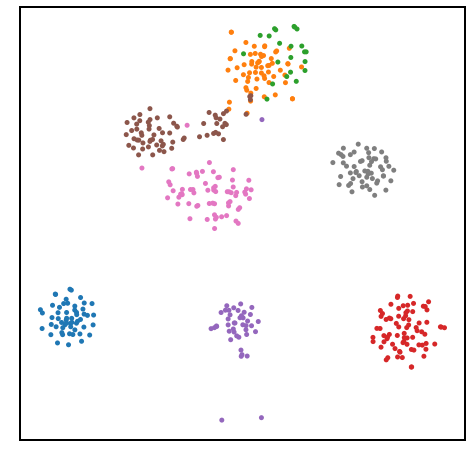

In [111]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,16)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

fig = plt.figure(figsize=(10, 10))
gs=fig.add_gridspec(10,10)

ax=fig.add_subplot(gs[1:9,1:9])

#ax = fig.add_subplot(111)

plot_value=exp_data_meta_transformed['phenoid']
plot_value_unique=plot_value.unique().tolist()
plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))


#sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value_int],data=exp_data_meta,palette=plt.cm.rainbow if plot_value.dtype==int else None)#,)#,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)    
scatterfig=sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=plot_value,data=exp_data_meta_transformed,
                palette=DiscretePalette(len(plot_value_unique)).tolist() if plot_value.dtype==int else None,
               ax=ax,s=25,alpha=1,edgecolor='None'
               )#,)#,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)    

#plt.legend('')
ax.get_legend().remove()
ax.set_ylabel(' ')
ax.set_xlabel(' ')

ax.set_xticks([])
ax.set_yticks([])
#ax.get_xaxis().set_ticks([])
#ax.get_xaxis().set_label('a')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
#ax.legend('')
#
plt.savefig('{}/plot_image/2D_Plot.png'.format(report_path),dpi=100,bbox_inches='tight')
plt.show()

In [32]:
plt.rcParams["axes.prop_cycle"]

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


In [33]:
DiscretePalette(len(plot_value_unique)).tolist()

['#F0A0FF',
 '#0075DC',
 '#993F00',
 '#4C005C',
 '#191919',
 '#005C31',
 '#2BCE48',
 '#FFCC99']

In [34]:
exp_data.shape,cell_size_factor.shape

((14694, 446), (446,))

In [39]:
exp_data_corrected=(exp_data/cell_size_factor)

In [123]:
#%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns

#plt.rcParams["figure.figsize"] = (5*8,10)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'
plt.ioff()

#for idx,(iter_idx,value) in enumerate(marker_criteria.iteritems()):
#for idx, (iter_idx,row) in enumerate(allscore[allscore['ismarker']==True].sort_values('all_rank').iterrows()):    
for count_idx, (iter_idx,row) in enumerate(allscore.sort_values('MarcoPolo',ascending=True).iloc[:].iterrows()):    
    
    if dataset_name!='Zhengmix8eq':
        phenoid_unique=exp_data_meta_transformed['phenoid'].unique()
    else:
        phenoid_unique=['b.cells',  'cd14.monocytes', 'cd56.nk',
                    'naive.cytotoxic','regulatory.t','cd4.t.helper', 'memory.t', 'naive.t']
    

    
    #subplot_size=(1,1+1+1+1+1)
    subplot_size=(1,1+1+1+1)
    
    
    #if idx==10*(subplot_size[0]*subplot_size[1]):
    #    break    
    

    #fig, axes = plt.subplots(*subplot_size)
    #fig = plt.figure(figsize=(3*10, 3*2)) 
    fig = plt.figure(figsize=(3*8, 6)) 
    gs=fig.add_gridspec(6,3*8)
    subplot_list=[fig.add_subplot(gs[0:6,0:6]),
                  fig.add_subplot(gs[0:6,6+2:6+2+6])]
    
    #gs = gridspec.GridSpec(subplot_size[0], subplot_size[1], width_ratios=[2, 1, 1, 1]) 
        
        
    #plt.subplots_adjust(wspace=0, hspace=0)
    
    #plt.text(.5,.95,'QQ:{:.1f}={}th Voting:{:d}={:d}th->{:d}'.format(row['QQratio'],int(row['QQratio_rank']),int(row['votingscore']),int(row['votingscore_rank']),int(row['all_rank']),idx),
    #                horizontalalignment='center',
    #                transform=ax.transAxes)
    

    exp_data_corrected_on=exp_data_corrected[iter_idx][gamma_argmax_list[iter_idx]==0]
    exp_data_corrected_off=exp_data_corrected[iter_idx][gamma_argmax_list[iter_idx]==1]
    
    bins_log=[np.power(1.2,i) for i in range(np.max([1,int(np.log(np.max([1,np.max(exp_data_corrected)]))/np.log(1.2))]))]
    bins_log_on=[np.power(1.1,i) for i in range(
        np.max([1,int(np.log(np.max([1,np.min(exp_data_corrected_on)]))/np.log(1.1))]),
        np.max([1,int(np.log(np.max([1,np.max(exp_data_corrected_on)]))/np.log(1.1))])
    
    )]
    bins_log_off=[np.power(1.2,i) for i in range(np.max([1,int(np.log(np.max([1,np.max(exp_data_corrected_off)]))/np.log(1.2))]))]
    
    
    
    
    
    for idx in range(2):
        #ax=plt.subplot(gs[idx%((subplot_size[0]*subplot_size[1]))])
        ax=subplot_list[idx]
        #ax=axes.flatten()[idx%((subplot_size[0]*subplot_size[1]))]
        #ax.set_axis_off()
        #ax.set_xticklabels([])
        #ax.set_yticklabels([])
        #ax.legend().remove()
        #ax.legend().set_visible(False)
        if idx==-1:
            plot_value=np.log10(1+exp_data_corrected[iter_idx])
            #plot_value=(plot_value-np.min(plot_value))/np.var(plot_value)
            #gamma_argmax_list[iter_idx]

            #ax.set_title(label=)
            #ax.title.set_text('QQ:{:.1f}={}th Voting:{:d}={:d}th->{:d}={:d}th'.format(row['QQscore'],int(row['QQscore_rank']),int(row['votingscore']),int(row['votingscore_rank']),int(row['all_rank']),idx))
            ax.title.set_text('tSNE')
            sns.scatterplot(x="TSNE_1", y="TSNE_2",label=None,legend=None,
                            hue=plot_value,data=exp_data_meta_transformed,ax=ax,s=15,linewidth=0.3,alpha=0.4,palette=plt.cm.Blues)#,palette=plt.cm.rainbow)#,linewidth=0.3)            
        if idx==0:

            #ax.set_title(label=)
            #ax.title.set_text('QQ:{:.1f}={}th Voting:{:d}={:d}th->{:d}={:d}th'.format(row['QQscore'],int(row['QQscore_rank']),int(row['votingscore']),int(row['votingscore_rank']),int(row['all_rank']),idx))
            
            plot_value=exp_data_meta_transformed['phenoid']
            plot_value_unique=plot_value.unique().tolist()
            plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))            
            
            s=10
            sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=plot_value,data=exp_data_meta_transformed,
                            palette=DiscretePalette(len(plot_value_unique)).tolist() if plot_value.dtype==int else None,
                           ax=ax,alpha=0.3,edgecolor="None",
                            s=s
                           )
            sns.scatterplot(x="TSNE_1", y="TSNE_2",data=exp_data_meta_transformed.loc[gamma_argmax_list[iter_idx]==0],ax=ax,
                            edgecolor=[1,0,0,1],
                            facecolors="None",
                            linewidths=10,
                            s=s
                           )
            
            """
            plot_value=gamma_argmax_list[iter_idx]
            sns.scatterplot(x="tSNE_1", y="tSNE_2", label=None,legend=None,hue=plot_value,
                            data=data,ax=ax,s=15,linewidth=0.3,alpha=0.4)#,palette=plt.cm.rainbow)#,linewidth=0.3)            
            """            
            
            ax.title.set_text('On-Off in 2D plot')
            ax.get_legend().remove()
            
            ax.set_xlabel('Dim 1')            
            ax.set_ylabel('Dim 2',labelpad=-10)
            
            for axis in ['top','bottom','left','right']:
                ax.spines[axis].set_linewidth(1.5)              
            
        elif idx==1:
            ax.title.set_text('Expression of Cells')
            #bins_count,bins,patch=ax.hist(exp_data[iter_idx],bins=bins_log,color='black')
            ax.hist(exp_data_corrected_on,bins=bins_log,label='On',color=(1,0,0,0.8))
            ax.hist(exp_data_corrected_off,bins=bins_log,label='Off',color=(0.5,0.5,0.5,0.5))
            ax.set_xscale('log')
                        
            ax.set_ylabel('Cell Counts')                        
            ax.set_xlabel('Expression count (size factor corrected)')
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False) 
            
            leg=ax.legend(loc='upper left',
                                fontsize=15,
                                frameon=False,
                                bbox_to_anchor=(0.22, -0.15),
                                ncol=2,
                              handletextpad=0.2,
                                  columnspacing=1.3,
                                markerscale=2.5)  
            [rec.set_height(8) for rec in leg.get_patches()]
            [rec.set_width(15) for rec in leg.get_patches()]
            for axis in ['top','bottom','left','right']:
                ax.spines[axis].set_linewidth(2)             
            
            #sns.distplot(a=exp_data[iter_idx],kde=False,color='black',ax=ax)
        elif idx==2:
            ax.title.set_text('Expression of On Cells')
            ax.hist(exp_data_corrected_on,bins=bins_log_on,color=(1,0,0,0.8))
            #bins_count,bins,patch=ax.hist(exp_data_on,bins=bins_log,color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
            ax.set_xscale('log')
            
            ax.set_ylabel('Cell Counts')                        
            ax.set_xlabel('Expression count (size factor corrected)')
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)              
            
            #sns.distplot(a=exp_data[iter_idx][gamma_argmax_list[iter_idx]==0],kde=False,color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],ax=ax)
        elif idx==3:
            ax.title.set_text('Expression of Off Cells')
            ax.hist(exp_data_corrected_off,bins=bins_log_off,color=(0.5,0.5,0.5,0.5))
            #bins_count,bins,patch=ax.hist(exp_data_off,bins=bins_log,color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
            ax.set_xscale('log')
            
            ax.set_ylabel('Cell Frequency')                        
            ax.set_xlabel('Expression count (size factor corrected)')
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)              
            
            #sns.distplot(a=exp_data[iter_idx][gamma_argmax_list[iter_idx]!=0],kde=False,color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],ax=ax)
            #ax.axvline(x=1,linewidth=10)
            #plt.Line2D([0.5,0.5],[1,1], transform=fig.transFigure, color="black")
            #ax.axvspan(0.8, 0.9, transform=fig.transFigure,clip_on=False) 
    
    plt.savefig('{}/plot_image/{}.png'.format(report_path,iter_idx),dpi=60,bbox_inches='tight')
    #plt.show()
    plt.close(fig)
    
    if count_idx==1200:
        break

In [121]:
report_path

'report/Kohinbulk_filtered'

In [57]:
allscore.sort_values('MarcoPolo',ascending=True).iloc[:]

,QQratio,QQdiff,votingscore,PCvariance2,PCvariance3,PCvariance5,PCvariance10,PCstd2,PCstd3,PCstd5,...,PCstd10_rank,lfc_rank,mean_0_all_rank,minorsize_rank,all_rank,all_rank_rank,bimodalityscore_rank,proximityscore_rank,MarcoPolo,MarcoPolo_rank
1,0.999997,-0.000168,14694,404.176420,329.879415,253.766488,169.596453,19.560696,17.528540,15.240457,...,12229,14689,14693,1,14693,3533,14694,14694,0,0
2,1.000000,-0.000010,14694,404.176420,329.879415,253.766488,169.596453,19.560696,17.528540,15.240457,...,12230,14690,14692,2,14694,3534,14694,14694,1,1
5510,9.059085,843.966579,105,80.152782,57.600443,61.352380,74.049270,7.819990,6.391638,7.102328,...,159,193,47,9406,9458,1496,1,71,1,2
12316,8.077825,1519.335940,96,76.293091,53.318604,67.810200,100.253430,7.920872,6.185483,7.455517,...,342,26,278,14435,8463,1214,2,75,2,3
1151,1.000000,-0.000008,14694,404.176420,329.879415,253.766488,169.596453,19.560696,17.528540,15.240457,...,12228,14693,14690,4,14695,3538,14694,14694,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,2.038117,494.822413,15,434.260812,354.949967,264.773436,171.697381,20.431486,18.291564,15.516936,...,11985,8836,14466,5170,34445,13341,13976,14214,13976,14689
13596,1.920127,594.765391,16,438.543209,364.412930,293.566681,213.087135,20.240120,18.394120,16.509565,...,14343,8290,14328,7551,32503,12469,14321,14027,14027,14690
13971,1.949964,583.428510,13,446.106787,354.087392,266.478109,188.268201,20.312670,17.888536,15.365469,...,13464,7494,14315,7333,33485,12931,14243,14104,14104,14691
676,2.384875,81.859471,16,393.780094,324.674470,249.776241,162.626914,19.227950,17.370351,15.102685,...,10848,14087,1116,5808,42183,14691,14694,14694,14113,14692


In [60]:
allscore_munge.sort_values('MarcoPolo',ascending=True).iloc[:]

,MarcoPolo_rank,Gene ID,Symbol,description,Other_designations,type_of_gene,Log2FC,MarcoPolo,bimodalityscore_rank,votingscore_rank,proximityscore_rank,lfc,lfc_rank,minorsize,minorsize_rank,dbXrefs,img
1,0,ENSG00000210082,NaN,NaN,NaN,NaN,NaN,0,14694,0,14694,NaN,14689,446,1,NaN,"<img src=""plot_image/1.png"" alt=""1"">"
2,1,ENSG00000198712,NaN,NaN,NaN,NaN,NaN,1,14694,1,14694,NaN,14690,446,2,NaN,"<img src=""plot_image/2.png"" alt=""2"">"
5510,2,ENSG00000168542,COL3A1,collagen type III alpha 1 chain,collagen alpha-1(III) chain|Ehlers-Danlos synd...,protein-coding,6.79,1,1,3911,71,2.04,193,68,9406,MIM:120180|HGNC:HGNC:2201|Ensembl:ENSG00000168542,"<img src=""plot_image/5510.png"" alt=""5510"">"
12316,3,ENSG00000099260,PALMD,palmdelphin,palmdelphin|paralemmin-like protein|paralemnin...,protein-coding,7.91,2,2,4225,75,2.38,26,13,14435,MIM:610182|HGNC:HGNC:15846|Ensembl:ENSG0000009...,"<img src=""plot_image/12316.png"" alt=""12316"">"
1151,4,ENSG00000109390,NDUFC1,NADH:ubiquinone oxidoreductase subunit C1,"NADH dehydrogenase [ubiquinone] 1 subunit C1, ...",protein-coding,NaN,2,14694,2,14694,NaN,14693,446,4,MIM:603844|HGNC:HGNC:7705|Ensembl:ENSG00000109390,"<img src=""plot_image/1151.png"" alt=""1151"">"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,14689,ENSG00000197182,MIRLET7BHG,MIRLET7B host gene,MIRLET7B host gene (non-protein coding),ncRNA,3.66,13976,13976,14291,14214,1.10,8836,109,5170,MIM:618216|HGNC:HGNC:37189|Ensembl:ENSG0000019...,"<img src=""plot_image/13735.png"" alt=""13735"">"
13596,14690,ENSG00000233671,CENPNP1,CENPN pseudogene 1,centromere protein N pseudogene,pseudo,3.78,14027,14321,14085,14027,1.14,8290,85,7551,HGNC:HGNC:54592|Ensembl:ENSG00000233671,"<img src=""plot_image/13596.png"" alt=""13596"">"
13971,14691,ENSG00000233086,LNCARSR,lncRNA regulator of Akt signaling associated w...,lncRNA Activated in RCC with Sunitinib Resista...,ncRNA,3.95,14104,14243,14497,14104,1.19,7494,87,7333,HGNC:HGNC:53864|Ensembl:ENSG00000233086,"<img src=""plot_image/13971.png"" alt=""13971"">"
676,14692,ENSG00000139218,SCAF11,SR-related CTD associated factor 11,protein SCAF11|CTD-associated SR protein 11|SC...,protein-coding,1.80,14113,14694,14113,14694,0.54,14087,102,5808,MIM:603668|HGNC:HGNC:10784|Ensembl:ENSG0000013...,"<img src=""plot_image/676.png"" alt=""676"">"


In [62]:
[gamma_argmax_list[1]==0]

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [44]:
exp_data_off

array([], dtype=float64)

In [ ]:
dsdsd

# Old

In [29]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns

#plt.rcParams["figure.figsize"] = (5*8,10)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'
plt.ioff()

#for idx,(iter_idx,value) in enumerate(marker_criteria.iteritems()):
#for idx, (iter_idx,row) in enumerate(allscore[allscore['ismarker']==True].sort_values('all_rank').iterrows()):    
for count_idx, (iter_idx,row) in enumerate(allscore.sort_values('MarcoPolo',ascending=True).iterrows()):    
    
    if dataset_name!='Zhengmix8eq':
        phenoid_unique=exp_data_meta_transformed['phenoid'].unique()
    else:
        phenoid_unique=['b.cells',  'cd14.monocytes', 'cd56.nk',
                    'naive.cytotoxic','regulatory.t','cd4.t.helper', 'memory.t', 'naive.t']
    

    
    #subplot_size=(1,1+1+1+1+1)
    subplot_size=(1,1+1+1+1)
    
    
    #if idx==10*(subplot_size[0]*subplot_size[1]):
    #    break    
    

    #fig, axes = plt.subplots(*subplot_size)
    #fig = plt.figure(figsize=(3*10, 3*2)) 
    fig = plt.figure(figsize=(3*8, 3*2)) 
    gs = gridspec.GridSpec(subplot_size[0], subplot_size[1], width_ratios=[2, 1, 1, 1]) 
        
        
    #plt.subplots_adjust(wspace=0, hspace=0)
    
    #plt.text(.5,.95,'QQ:{:.1f}={}th Voting:{:d}={:d}th->{:d}'.format(row['QQratio'],int(row['QQratio_rank']),int(row['votingscore']),int(row['votingscore_rank']),int(row['all_rank']),idx),
    #                horizontalalignment='center',
    #                transform=ax.transAxes)
    
    
    
    
    for idx in range(subplot_size[1]):
        ax=plt.subplot(gs[idx%((subplot_size[0]*subplot_size[1]))])
        #ax=axes.flatten()[idx%((subplot_size[0]*subplot_size[1]))]
        #ax.set_axis_off()
        #ax.set_xticklabels([])
        #ax.set_yticklabels([])
        #ax.legend().remove()
        #ax.legend().set_visible(False)
        if idx==-1:
            plot_value=np.log10(1+exp_data[iter_idx])
            #plot_value=(plot_value-np.min(plot_value))/np.var(plot_value)
            #gamma_argmax_list[iter_idx]

            #ax.set_title(label=)
            #ax.title.set_text('QQ:{:.1f}={}th Voting:{:d}={:d}th->{:d}={:d}th'.format(row['QQscore'],int(row['QQscore_rank']),int(row['votingscore']),int(row['votingscore_rank']),int(row['all_rank']),idx))
            ax.title.set_text('tSNE')
            sns.scatterplot(x="TSNE_1", y="TSNE_2",label=None,legend=None,
                            hue=plot_value,data=exp_data_meta_transformed,ax=ax,s=15,linewidth=0.3,alpha=0.4,palette=plt.cm.Blues)#,palette=plt.cm.rainbow)#,linewidth=0.3)            
        if idx==0:

            #ax.set_title(label=)
            #ax.title.set_text('QQ:{:.1f}={}th Voting:{:d}={:d}th->{:d}={:d}th'.format(row['QQscore'],int(row['QQscore_rank']),int(row['votingscore']),int(row['votingscore_rank']),int(row['all_rank']),idx))
            
            plot_value=exp_data_meta_transformed['phenoid']
            plot_value_unique=plot_value.unique().tolist()
            plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))            
            
            s=10
            sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=plot_value,data=exp_data_meta_transformed,
                            palette=DiscretePalette(len(plot_value_unique)).tolist() if plot_value.dtype==int else None,
                           ax=ax,alpha=0.3,edgecolor="None",
                            s=s
                           )
            sns.scatterplot(x="TSNE_1", y="TSNE_2",data=exp_data_meta_transformed.loc[gamma_argmax_list[iter_idx]==0],ax=ax,
                            edgecolor=[0,0,1,1],
                            facecolors="None",
                            linewidths=10,
                            s=s
                           )
            
            """
            plot_value=gamma_argmax_list[iter_idx]
            sns.scatterplot(x="tSNE_1", y="tSNE_2", label=None,legend=None,hue=plot_value,
                            data=data,ax=ax,s=15,linewidth=0.3,alpha=0.4)#,palette=plt.cm.rainbow)#,linewidth=0.3)            
            """            
            
            ax.title.set_text('On-Off in 2D Plot')
            ax.get_legend().remove()
            ax.set_ylabel('')
            ax.set_xlabel('')            
            
        elif idx==1:
            ax.title.set_text('Distribution of all cells')
            bins_count,bins,patch=ax.hist(exp_data[iter_idx],color='black')
            #sns.distplot(a=exp_data[iter_idx],kde=False,color='black',ax=ax)
        elif idx==2:
            ax.title.set_text('Distribution of "On" cells')
            exp_data_on=exp_data[iter_idx][gamma_argmax_list[iter_idx]==0]
            ax.hist(exp_data_on,bins=bins,color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
            #sns.distplot(a=exp_data[iter_idx][gamma_argmax_list[iter_idx]==0],kde=False,color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],ax=ax)
        elif idx==3:
            ax.title.set_text('Distribution of "Off" cells')
            exp_data_off=exp_data[iter_idx][gamma_argmax_list[iter_idx]!=0]
            ax.hist(exp_data_off,bins=bins,color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
            #sns.distplot(a=exp_data[iter_idx][gamma_argmax_list[iter_idx]!=0],kde=False,color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],ax=ax)
            #ax.axvline(x=1,linewidth=10)
            #plt.Line2D([0.5,0.5],[1,1], transform=fig.transFigure, color="black")
            #ax.axvspan(0.8, 0.9, transform=fig.transFigure,clip_on=False)          
    plt.savefig('{}/plot_image/{}.png'.format(report_path,iter_idx),dpi=100,bbox_inches='tight')
    #plt.show()
    plt.close(fig)
    #if count_idx==1:
    #    break    
    if count_idx==1200:
        break

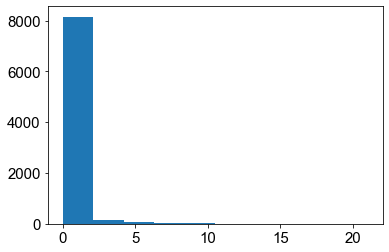

In [48]:
plt.hist(exp_data[2806])
iter_idx=2806

exp_data_off=exp_data[iter_idx][gamma_argmax_list[iter_idx]==1]
bins_log_off=[0]+[np.power(1.2,i) for i in range(int(np.log(np.max([1,np.max(exp_data_off)]))/np.log(1.2)))]

In [49]:
bins_log_off

[0]

In [44]:
allscore.sort_values('MarcoPolo',ascending=True)

,QQratio,QQdiff,votingscore,PCvariance,lfc,mean_0_all,minorsize,maxdiff,ismarker,QQratio_rank,QQdiff_rank,votingscore_rank,PCvariance_rank,lfc_rank,mean_0_all_rank,minorsize_rank,all_rank,all_rank_rank,MarcoPolo,MarcoPolo_rank
143,2.297311,5541.992994,1226,3356.410976,1.263185,4.985422,4081,0.0,False,1125,700,0,3380,5574,190,1,700,168,0,0
1032,8.395668,39391.406778,59,229975.763265,3.458092,2857.130372,77,0.0,False,305,10,907,6001,2204,0,5998,1824,315,0,1
3439,5.693702,57450.401319,47,12741.339557,3.235569,324.327644,53,0.0,False,426,0,1017,5987,2734,12,6000,2034,370,0,2
434,11.394040,42104.267261,24,42952.118222,3.293875,2415.984964,106,0.0,False,227,9,1288,5993,2639,1,5990,2585,484,1,3
144,2.652655,6559.704232,1102,3300.124216,1.511324,7.130613,3757,0.0,False,1005,370,1,3334,5378,123,38,372,87,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,-4.220881,3619.419685,1,7465.124268,2.228366,1.055648,1606,0.0,False,5410,1849,999999,5932,4611,2946,1700,2001847,3178,6002,5997
1843,-4.624199,3674.838868,1,7313.459241,2.361250,1.083595,1613,0.0,False,5455,1794,999999,5916,4434,2401,1688,2001792,3138,6002,5998
1842,-4.972151,3721.635254,1,6950.117242,2.430612,1.081256,1655,0.0,False,5487,1747,999999,5881,4323,2439,1619,2001745,3109,6002,5999
1790,-8.041016,4132.805443,1,7968.525498,3.210618,1.345552,1545,0.0,False,5689,1411,999999,5957,2811,1025,1792,2001409,2915,6002,6000


In [38]:
(int(np.log(np.max(1,np.max(exp_data))
           )/np.log(1.2)))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [40]:
np.max([1,np.max(exp_data)])

21740.0